
Scikit-Learn
============

[Scikit-Learn](http://scikit-learn.org/) é a principal biblioteca para
aprendizado de máquina do Python. Sua API é extremamente simples e
bem-pensada. Diferente de muitas bibliotecas deste tipo, ela é um
exemplo de documentação e qualidade de código. Vamos ver o básico, mas
sinta-se encorajado a olhar a documentação e descobrir tudo que está
implementado.

Pré-processamento: atributos numérico
-------------------------------------

Conforme vimos em aula, é comum termos que realizar algumas
transformações nas bases de dados para que os dados estejam de acordo
com as premissas dos algoritmos. Vamos ver algumas transformaçoes usando
a API do sklearn. É importante ressaltar que todas as técnicas
implementadas na sklearn são organizadas utilizando Orientação à
Objetos. No caso das transformações, vamos ver inicialmente três
objetos: `sklearn.preprocessing.StandardScaler`,
`sklearn.preprocessing.MinMaxScaler`,
`sklearn.preprocessing.Normalizer`.

Independente da transformação, a API consiste de três métodos:

-   `fit`: realiza os ajustes para a função de transformação
    considerando a base de dados;
-   `transform`: recebe uma base de dados e retorna ela com a
    transformação aplicada;
-   `fit_transform`: faz os dois passos anteriores na mesma base de
    dados.

Considerando as três transformações comentadas acima, para
`StandardScaler` (que transforma um atributo para média zero e desvio
padrão um) é necessário computar o valor da média e desvio padrão,
`MinMaxScaler` (que transforma os valores de um atributo em uma faixa,
usualmente \[0,1\]) é necessário encontrar o menor e maior valor
observada, e por fim, no `Normalizer` (que normaliza objetos para terem
norma 1: $\|\mathbf{x}_i\|=1$) o passo `fit` não realiza nenhuma
operação.

In [1]:
import pandas as pd
import sklearn.preprocessing as pp
#biblioteca com arrays N-dimensionais e computação científica em geral
import numpy as np

#criando um dataframe do pandas manualmente
X = pd.DataFrame({'A1': [1.,2.,3.,4.,5.], 'A2':[100.,200.,300.,41.,5.]})

Xscaled = pp.StandardScaler().fit_transform(X)
scaler = pp.StandardScaler()
scaler.fit(X)
#X.values corresponde ao array numpy que os dados do dataFrame estão usando
assert np.all(Xscaled == scaler.transform(X.values))
print("Médias de cada atributo original", scaler.mean_)

minmax = pp.MinMaxScaler()
Xmm = minmax.fit_transform(X)
print("X normalizado [0,1]:\n",Xmm)

norm = pp.Normalizer()
Xnorm = norm.transform(X)
print("X com norma 1 por linha:\n",Xnorm)


Médias de cada atributo original [  3.  129.2]
X normalizado [0,1]:
 [[0.         0.3220339 ]
 [0.25       0.66101695]
 [0.5        1.        ]
 [0.75       0.1220339 ]
 [1.         0.        ]]
X com norma 1 por linha:
 [[0.0099995  0.99995   ]
 [0.0099995  0.99995   ]
 [0.0099995  0.99995   ]
 [0.09709996 0.99527463]
 [0.70710678 0.70710678]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


### Exercício: Verifique que Xscaled tem média zero e desvio padrão um para cada atributo

Pré-processamento: atributos categóricos
----------------------------------------

Como vimos em algumas aulas, nem todos os algoritmos sabem lidar bem com
atributos categóricos. Na verdade, essa é uma das áreas deficientes na
biblioteca sklearn. Os algoritmos implementados assumem valores
contínuos. Para poder usar os algoritmos com atributos categóricos,
vamos convertê-los em $V$ atributos binários, sendo $V$ o número de
diferentes valores que o atributo pode ter. Essa transformação é
denominada `OneHotEncoder`.

In [2]:
enc = pp.OneHotEncoder()
X = [['estudante', 'computação', 'linux'], ['estudante', 'eiar', 'windows']]
enc.fit(X)
Xt = enc.transform([['estudante', 'computação', 'windows'],
                    ['estudante', 'eiar', 'linux']]).toarray()
print(Xt)

[[1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]]


Pré-processamento: discretização
--------------------------------

Para discretizar um atributo numérico, podemos utilizar o
`KBinsDiscretizer`. Essa classe implementa os dois modos de
discretização visto em sala: largura fixa (`strategy=`\'uniform\') e
frequência fixa (`strategy=`\'quantile\').

In [3]:
X2 = pd.DataFrame({'A1': [32,34,43,45,51,59,62,67,68,69,70,71,72]})
larg_fixa = pp.KBinsDiscretizer(n_bins = 8, strategy = 'uniform', encode = 'ordinal')
larg_fixa.fit(X2)
print(larg_fixa.transform(X2))
faixas = [ f"[{x:.0f},{y:.0f})" for x,y in zip(larg_fixa.bin_edges_[0], larg_fixa.bin_edges_[0][1:])]
print("Intervalos:" + ", ".join(faixas))


[[0.]
 [0.]
 [2.]
 [2.]
 [3.]
 [5.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]]
Intervalos:[32,37), [37,42), [42,47), [47,52), [52,57), [57,62), [62,67), [67,72)


In [4]:
X2 = pd.DataFrame({'A1': [32,34,43,45,51,59,62,67,68,69,70,71,72]})
freq_fixa = pp.KBinsDiscretizer(n_bins = 5, strategy = 'quantile', encode = 'ordinal')
freq_fixa.fit(X2)
print(freq_fixa.transform(X2))
faixas = [ f"[{x:.0f},{y:.0f})" for x,y in zip(freq_fixa.bin_edges_[0], freq_fixa.bin_edges_[0][1:])]
print("Intervalos:" + ", ".join(faixas))

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]]
Intervalos:[32,44), [44,57), [57,67), [67,70), [70,72)


Scikit-Learn - Parte 2
======================

Vimos anteriormente como utilizar a biblioteca Scikit-Learn para realizar o pré-processamento dos dados.
Veremos agora o básico sobre como rodar algoritmos de classificação e regressão nessa biblioteca.

Principais métodos
------------------

Os algoritmos de aprendizado de máquina implementados na Scikit-Learn utilizam uma API bastante intuitiva, você trabalhará frequentemente com três métodos:
- `fit`: treina um modelo, para algoritmos de aprendizado supervisionado você deve passar dois parâmetros `X` (matriz de dados que pode ser um `pandas.DataFrame`) e `y` (vetor com rótulos dos dados, pode ser uma coluna de um `pandas.DataFrame`, também conhecido como `pandas.Series`);
- `predict`: realiza a predição para novos dados, recebe como primeiro parâmetro uma matriz de objetos de teste;
- `predict_proba`: similar ao `predict`, mas ao invés de retornar apenas os rótulos de classe preditas, retorna a probabilidade _posteriori_ de cada classe, ou seja, $p(c|x)$.

Um breve exemplo
----------------

Vamos ver como treinar o modelo Naïve Bayes considerando todos os atributos distribuídos de acordo com uma distribuição Gaussiana.
Este algoritmo está implementado como `GaussianNB` no módulo `sklearn.naive_bayes`.
Vamos utilizar a base de dados Iris que tem 150 objetos, 4 atributos e 3 classes.


In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

dados = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
print(dados.head())
#sklearn trabalha com X e y separados
X, y = dados.drop(4, axis = 1), dados[4]
clf = GaussianNB()
clf.fit(X,y)


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


GaussianNB()

Podemos examinar o modelo por meio dos atributos do objeto `clf`. Por exemplo, podemos ver a média estimada para cada atributo em `clf.theta_`. Como temos 3 classes e 4 atributos, este atributo corresponde a uma matriz 3x4.

In [6]:
print(clf.theta_)

[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


Você pode ver todas as informações armazenadas no modelo na [documentação dessa classe](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).
Podemos examinar o erro obtido por esse modelo considerando os dados de treinamento por meio do `predict`.

In [7]:
predicoes = clf.predict(X)
qtd_erros = predicoes != y
taxa_erro = qtd_erros.sum() / X.shape[0]
print(f"Erro de treinamento: {taxa_erro:.3f}")

Erro de treinamento: 0.040


Esse erro não é muito informativo, seria melhor vermos quanto ele erra em dados que não foram usados no treinamento. Para ajudar nisso, podemos utilizar [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit).
Com ele, temos um conjunto de divisões aleatórias da base de dados que mantém a proporção de objetos de cada classe em cada divisão.


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
divisoes = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=0)
for idx_treino, idx_teste in divisoes.split(X, y):
    print("Objetos no treino:", idx_treino)
    print("Objetos no teste:", idx_teste)
    Xtreino, ytreino = X.iloc[idx_treino], y.iloc[idx_treino]
    Xteste, yteste = X.iloc[idx_teste], y.iloc[idx_teste]
    erros = clf.fit(Xtreino, ytreino).predict(Xteste) != yteste
    print(f"Erro de teste: {erros.sum()/len(idx_teste):.3f}")


Objetos no treino: [ 16  69  15   4  78 138 111  10  93  45  74  58 106  22  56  28 107  27
  94  72  66  33 143  87  96 115  73  84  26 126  11  91 128 105  79  48
   7 148  31 119  59 124  38  57  95 101  83 137 112  52  92  30  63  42
  14 108 125 122 141  32 140  35  76  41   2  18 146 135 127 116  80  29
 104  82  34]
Objetos no teste: [139  65 145   6 129  25  85  23 118  64  17 121  71  39  67  36 131 149
  24   0  89   8 136 110 132 147 117   9 130  75 134 144  97 114  19  43
  49  21  50  86  37  20  61  81   5 123  44  99  77 102  98   3 142  40
  88  60  12 103  53 109  90 133  70 100  13  47  54   1  51  68 113  62
 120  46  55]
Erro de teste: 0.053
Objetos no treino: [  7  10 141   6  94  31 113 140 108  11 128  96 149 110  98   4 101  44
   5   2 144 102 112  86  41  20  59 118 148 115  99 132  88  57 105 103
  83  45 138  62  74  81  52  13 114  67  40  47  82  33 106  38  18 135
  63  75  79  37  55  72  70 111  95 142  15  64 121  19  91  42  26 126
  12   1  69]
Objet

É possível notar um pequeno aumento na taxa de erro. Isso é esperado. A taxa de erro no treinamento tende a ser uma estimativa otimista, afinal, aqueles dados foram usados para treinar o modelo.

Note que o método `fit` retorna o próprio objeto, portanto, podemos utilizar os métodos por meio de uma [interface fluente](https://en.wikipedia.org/wiki/Fluent_interface).
Um conjunto considerável de algoritmos está implementado [na biblioteca](https://scikit-learn.org/stable/supervised_learning.html). O fato deles usarem a mesma API facilita bastante seu uso.


Visualizando fronteiras de decisão
==================================

Como vimos nas aulas, quando temos apenas dois atributos é interessante visualizar a fronteira de decisão entre as classes.
Uma forma simples, que funciona para qualquer modelo independente da complexidade de sua fronteira, é realizar a predição para cara ponto em um _grid_ pré-definido.

Para ilustrar isso, transformaremos os atributos originais da base Iris (comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala) em atributos de área e consideramos pontos entre os limites de valores presentes na base de dados.

   area_sepala  area_petala
0        17.85         0.28
1        14.70         0.28
2        15.04         0.26
3        14.26         0.30
4        18.00         0.28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


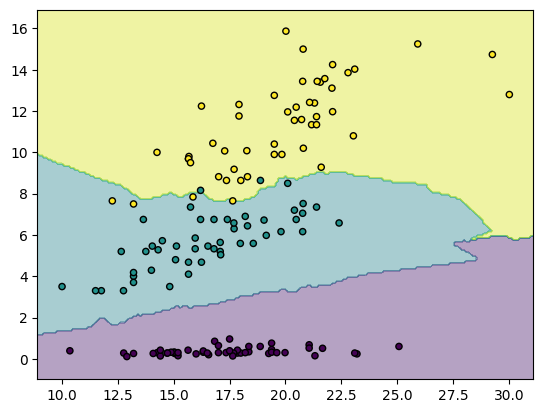

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris,cls = load_iris(return_X_y=True)
novaIris = pd.DataFrame({'area_sepala': iris[:,0] * iris[:,1],
                         'area_petala': iris[:,2] * iris[:,3]})

print(novaIris.head())

xMin, xMax = novaIris['area_sepala'].min() - 1, novaIris['area_sepala'].max() + 1
yMin, yMax = novaIris['area_petala'].min() - 1, novaIris['area_petala'].max() + 1

xx, yy = np.meshgrid(np.arange(xMin - 0.1, xMax + 0.1, 0.1),
                     np.arange(yMin - 0.1, yMax + 0.1, 0.1))

modelo = KNeighborsClassifier(n_neighbors = 7)
modelo.fit(novaIris, cls)

ax = plt.gca()
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(novaIris['area_sepala'], novaIris['area_petala'], c=cls, s=20, edgecolor='k')

Validação cruzada
==================================

O Scikit-Learn possui diversos utilitários para auxiliar na avaliação de modelos por meio de validação cruzada. Sugiro que você leia [esta página que os descreve](https://scikit-learn.org/stable/modules/cross_validation.html).

Veremos dois usos comuns:
1. Obter o $E_{CV}$, ou seja, erro médio de validação cruzada;
2. Como ter o laço de controle da validação cruzada, tendo assim acesso à quais objetos estão em cada pasta.





## Obtendo $E_{CV}$

Para isso podemos usar a função `cross_val_score`.
O método recebe quatro parâmetros:
- Um objeto com o classificador que deverá ser usado (ele será re-treinado a cada iteração da validação cruzada);
- A matriz de dados;
- O vetor com as saídas esperadas;
- O número de pastas que devem ser utilizadas (parâmetro `cv`).

[Como pode ser visto aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score), essa função tem diversos outros parâmetros que controlem inclusive o paralelismo de execução, mas estes sãos os básicos para o que queremos.
A função retorna o erro, por padrão usando a medida de avaliação *acurácia*, obtido em cada iteração.



In [10]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, novaIris, cls, cv=5)
print(scores)

[1.         1.         0.93333333 0.93333333 1.        ]


## Laço de validação cruzada


Por vezes você vai precisar ter controle sobre os dados dentro do laço principal de validação cruzada, por exemplo, quando quer testar vários modelos e analisar os erros obtidos em cada pasta.

A classe `StratifiedKFold` pode auxiliar nisso. Ela realiza a divisão dos objetos considerando a proporção dos objetos de cada classe. Em outras palavras, a mesma proporção de objetos em cada classe na base original é refletida em cada uma das pastas.
Seu uso é bem simples, funciona similar ao `StratifiedShuffleSplit` que vimos antes.



In [11]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 10)
for idx_treino, idx_teste in kf.split(novaIris, cls):
    Xtreino, ytreino = novaIris.iloc[idx_treino], cls[idx_treino]
    Xteste, yteste = novaIris.iloc[idx_teste], cls[idx_teste]
    erros = clf.fit(Xtreino, ytreino).predict(Xteste) != yteste
    print(f"Erro de teste: {erros.sum()/len(idx_teste):.3f}")


Erro de teste: 0.000
Erro de teste: 0.000
Erro de teste: 0.000
Erro de teste: 0.000
Erro de teste: 0.133
Erro de teste: 0.000
Erro de teste: 0.133
Erro de teste: 0.000
Erro de teste: 0.000
Erro de teste: 0.000


# Seleção de modelos

Vimos em aula que um procedimento muito utilizado para a seleção de modelos é a validação cruzada.
Basicamente, tínhamos que realizar validação cruzada para cada algoritmo (com sua configuração de hiperparâmetros) e escolher aquele que apresentava o menor $E_{CV}$.

Implementar isso para pode ser um pouco tedioso, felizmente temos o `GridSearchCV` que nos permite fazer exatamente isso!

A ideia consiste em termos um *grid* de parâmetros contendo todos os parâmetros que queremos variar para um algoritmo. O `GridSearchcV` vai simplesmente rodar todos (busca exaustiva) e selecionar o melhor.
Após selecionar o melhor, ele automaticamente (configurável via parâmetro), re-treina o modelo com todos os dados, **como deve ser feito**.

[Vale a pena conhecer um pouco mais sobre essa funcionalidade no scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html).

[Caso queira usar o `GridSearchCV` para diferentes classificadores, vale a pena você conhecer sobre o `Pipeline`](https://scikit-learn.org/stable/modules/compose.html#pipeline).

In [12]:
from sklearn.model_selection import GridSearchCV
from pprint import PrettyPrinter
pp = PrettyPrinter()

prm_grid = [ #cada elemento dessa lista é um dicionário com os parâmetros que devem ser buscados em exaustão e seus limites
    {'n_neighbors': [1, 3, 5, 7]}
]
knn = KNeighborsClassifier()
#validação cruzada de 5 pastas
cv = GridSearchCV(knn, prm_grid, cv = 5)
cv.fit(novaIris, cls)
print("Resultados encontrados na validação cruzada")
pp.pprint(cv.cv_results_)

print("Melhor parâmetro identificado")
print(cv.best_params_)
print("Classificador re-treinado")
print(cv.best_estimator_)


Resultados encontrados na validação cruzada
{'mean_fit_time': array([0.00172572, 0.00130019, 0.00126328, 0.00122366]),
 'mean_score_time': array([0.0033803 , 0.00268922, 0.00267005, 0.0026906 ]),
 'mean_test_score': array([0.97333333, 0.96      , 0.96666667, 0.96666667]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7],
             mask=[False, False, False, False],
       fill_value=999999),
 'params': [{'n_neighbors': 1},
            {'n_neighbors': 3},
            {'n_neighbors': 5},
            {'n_neighbors': 7}],
 'rank_test_score': array([1, 4, 2, 2], dtype=int32),
 'split0_test_score': array([1.        , 0.96666667, 0.96666667, 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 0.96666667, 0.96666667]),
 'split2_test_score': array([0.93333333, 0.96666667, 0.96666667, 0.96666667]),
 'split3_test_score': array([0.93333333, 0.9       , 0.93333333, 0.93333333]),
 'split4_test_score': array([1., 1., 1., 1.]),
 'std_fit_time': array([5.73667987e-04, 4.86608991e-